In [107]:
import numpy as np
import matplotlib.pyplot as plt

from conditional_explainer import preddiff, shapley
from conditional_explainer.imputers import simple_imputers

In [84]:
def paper_target_fn(data: np.ndarray) -> np.ndarray:
    """
    Simple analytic regression function with four features.
    Target function: x0^2 + 3*x1 + sin(x2) - x3**3 / 2 + sgn(x0) * abs(x1)
    """
    assert data.ndim > 1, 'Last dimension are feature, minimum a single sample dimension expected'
    sample_shape = data.shape[:-1]
    prediction = data[..., 0] ** 2 + 3. * data[..., 1] + np.sin((data[..., 2] - 2.)) - data[..., 3] ** 3 / 2 \
                 + 2 * np.sign(data[..., 0]) * np.abs(data[..., 1])
    return prediction.reshape(*sample_shape, 1)


In [85]:
mean_data = np.zeros(4)
cov_data = np.eye(4)

rng = np.random.default_rng(seed=0)
test_data = 3* rng.normal(size=(400, 4))

In [108]:
impute_fn = simple_imputers.get_gaussian_noise_imputer(mu_data=mean_data, cov_data=cov_data)
# explainer = preddiff.PredDiff(model_fn=paper_target_fn, impute_fn=impute_fn, n_eval=1000, data=rng.random(size=(10, 4)))
explainer = shapley.ShapleyValues(model_fn=paper_target_fn, impute_fn=impute_fn, n_eval=1000, data=rng.random(size=(10, 4)))

In [109]:
segmentation = np.arange(4)
dict_attributions = explainer.attribution(data=test_data, segmentation=np.broadcast_to(segmentation, test_data.shape),
                                          target_features=np.array([0, 1, 2, 3]))

In [110]:
figsize = (15, 8)
data = dict_attributions['data']

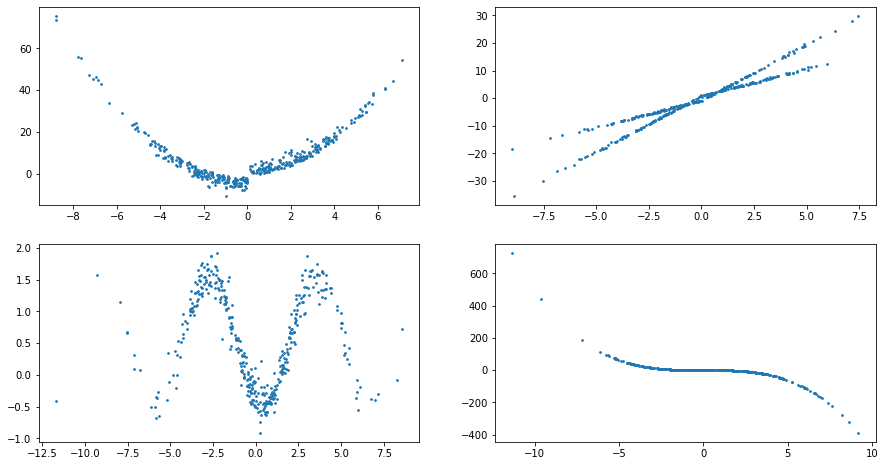

In [111]:
fig = plt.figure(figsize=figsize)
for i_feature in range(4):
    ax = plt.subplot(2,2,i_feature+1)
    ax.scatter(data[:, i_feature], dict_attributions[f'{i_feature}'], s=3)

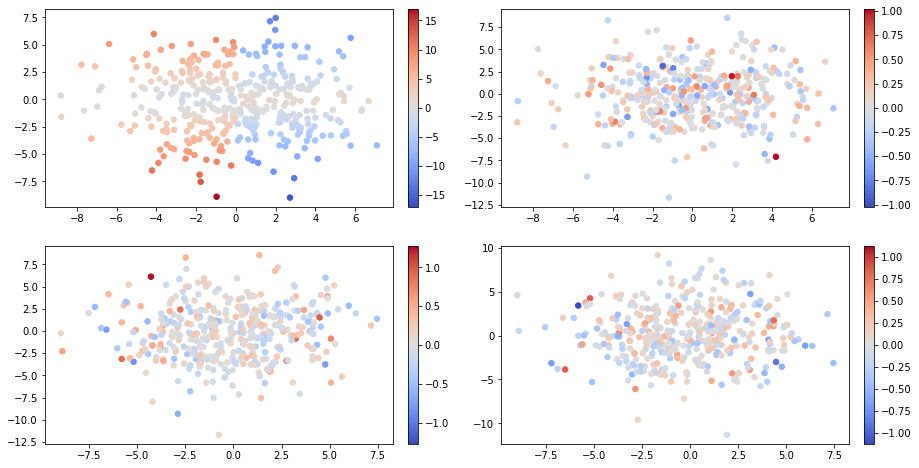

In [112]:
fig = plt.figure(figsize=figsize)
for index ,(i0, i1) in enumerate([(0, 1), (0, 2), (1, 2), (1, 3)]):
    ax = plt.subplot(2, 2, index+1)
    joint_effect = dict_attributions[f'{i0}^{i1}']
    vmax = np.abs(joint_effect).max()
    im = ax.scatter(data[:, i0], data[:, i1], c=joint_effect, s=30,
                    vmax=vmax, vmin=-vmax, cmap='coolwarm', marker='o')
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_xlabel(r"  $\,\,{\bar{m}}^{f}_{\backslash \, ab}$")
    cbar.ax.xaxis.set_label_position('top')


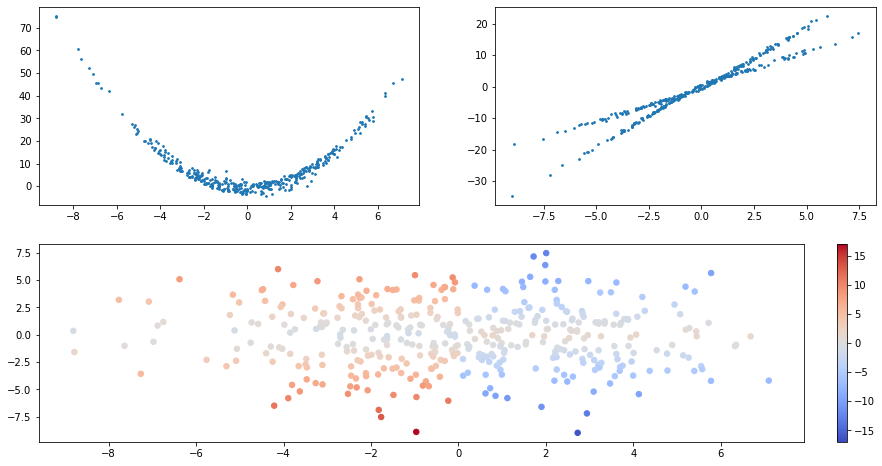

In [113]:
fig = plt.figure(figsize=figsize)
tuple_interaction = (0, 1)
(i0, i1) = tuple_interaction
joint_effect = dict_attributions[f'{i0}^{i1}']

for index, i_feature in enumerate(tuple_interaction):
    ax = plt.subplot(2,2,index+1)
    ax.scatter(data[:, i_feature], dict_attributions[f'{i_feature}'] + joint_effect, s=3)


ax = plt.subplot(2, 1, 2)
vmax = np.abs(joint_effect).max()
im = ax.scatter(data[:, i0], data[:, i1], c=joint_effect, s=30,
                vmax=vmax, vmin=-vmax, cmap='coolwarm', marker='o')
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_xlabel(r"  $\,\,{\bar{m}}^{f}_{\backslash \, ab}$")
cbar.ax.xaxis.set_label_position('top')

In [96]:
dict_attributions.keys()

dict_keys(['0', '1', '2', '3', '0^1', '0^2', '1^2', '0^3', '1^3', '2^3', '0^1^2', '0^1^3', '0^2^3', '1^2^3', '0^1^2^3', 'target_features', 'data', 'segmentation', 'explainer_name', 'model_fn', 'impute_fn', 'interaction_depth', 'n_eval', 'n_imputations', 'shape_x', 'n_classes'])